<div class="alert alert-success">
<h1> Привет, Александр!</h1>
    
    
Меня зовут Даниил, я буду проверять твой проект. Предлагаю общаться на "ты" :). Если это не совсем комфортно, пожалуйста, дай знать.
    
Моя главная цель - не указывать на твои ошибки, а помочь тебе закрепить изученный материал и приблизиться к освоению профессии. 
    
Здесь и далее я буду помечать свои комментарии в отдельных раскрашенных ячейках: 
    
- В зеленых ячейках (как эта) я буду оставлять свои рекомендации и комментарии, которые помогут сделать твое решение лучше. Доработки, приведенные в таких ячейках, не обязательны к выполнению. 

<div class="alert alert-warning">
<h1> Комментарий ревьюера 	&#128276;</h1>

В желтых ячейках я буду подсвечивать тебе некритичные ошибки и оставлять рекомендации на будущее, которые помогут тебе писать более эффективный код, защищать себя от ошибок, сделать проект более выразительным для заказчика. 
    
Не обязательно вносить правки по желтым комментариям для того, чтобы проект был принят.

</div>
    
<div class="alert alert-danger">
<h1> Комментарий ревьюера &#9940;</h1>

В красных комментариях будут оставлены рекомендации, выполнение которых необходимо для успешной сдачи проекта. Причины простановки каждого такого комментария я подробно опишу. В случае, если что-то осталось непонятным, пожалуйста, спрашивай. Очень важно, чтобы проект принес тебе максимум пользы. 

</div>
    
Давай работать над проектом в диалоге: если ты вносишь какие-то изменения согласно моим рекомендациям, обязательно укажи на это. Выбери для своих комментариев заметный цвет, чтобы я мог легче отследить изменения. Важно не перемещать и не удалять наши комментарии: так мы сможем провести повторное ревью оперативнее. 
    
<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
В таких ячейках ты можешь оставлять свои комментарии)

</div>

</div>

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

#### Импорт данных
Импортируем две таблицы с данными mkrf_shows.csv и mkrf_movies.csv

In [1]:
import pandas as pd
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(data_movies.info())
display(data_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

#### Объединение таблиц 
Таблицы data_movies и data_shows будут соединены по общему столбу 'puNumber', столбец data_movies['puNumber'] переводим в числовой формат из строчного, для корректного слияния.

In [2]:
data_movies['puNumber'] = data_movies['puNumber'].replace('нет','0') #перезапись нет в нули
data_movies['puNumber'] = data_movies['puNumber'].astype('int') #перевод столбца в число
data = pd.merge(data_movies,data_shows,left_on='puNumber',right_on='puNumber',how='left') #объединил две таблицы используя столбец data_movies['puNumber'] 

#### Проверка результатов объединения на корректность.

In [3]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


После слияния кол-во строк отсалось 7486, добавился столбец 'box_office' с кол-вом значений 3158. Слияние прошло корректно.

<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 2 &#9989;</h1>

Отлично.
    
</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [4]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data['refundable_support'] = data['refundable_support'].astype('float')
data['nonrefundable_support'] = data['nonrefundable_support'].astype('float')
data['budget'] = data['budget'].astype('float')
data['ratings'] = data['ratings'].replace('99%','9.9')
data['ratings'] = data['ratings'].replace('28%','2.8')
data['ratings'] = data['ratings'].replace('97%','9.7')
data['ratings'] = data['ratings'].replace('83%','8.3')
data['ratings'] = data['ratings'].replace('64%','6.4')
data['ratings'] = data['ratings'].replace('91%','9.1')
data['ratings'] = data['ratings'].replace('94%','9.4')
data['ratings'] = data['ratings'].replace('62%','6.2')
data['ratings'] = data['ratings'].replace('79%','7.9')
data['ratings'] = data['ratings'].replace('90%','9.0')
data['ratings'] = data['ratings'].replace('19%','1.9')
data['ratings'] = data['ratings'].replace('88%','8.8')
data['ratings'] = data['ratings'].replace('89%','8.9')
data['ratings'] = data['ratings'].replace('98%','9.8')
data['ratings'] = data['ratings'].astype('float')
#data['ratings'].unique()
#print(data['refundable_support'].unique())

#data.info()
display(data.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


- столбец data['show_start_date'] - преобразован в формат datetime64 и убрано время.
- столбец data['refundable_support'] - преобразован в формат float64.
- столбец data['nonrefundable_support'] - преобразован в формат float64.
- столбец data['budget'] - преобразован в формат float64.
- столбец data['ratings'] - преобразован в формат float64.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [5]:
display(data.info())
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

# Замена пропусков в количественных переменных
#data['refundable_support'] = data['refundable_support'].fillna(0) 
#data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0) 
#data['budget'] = data['budget'].fillna(0) 
#data['box_office'] = data['box_office'].fillna(0) 
data['director'] = data['director'].astype('str')
data['genres'] = data['genres'].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

None

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


- пропуски в колонках refundable_support, nonrefundable_support, budget, financing_source указывают на отсутсвие гос поддержки, такие пропуски можно не заполнять.
- пропуск в колонках ratings, genres, producer не превышают 13% общего числа, это не критично.
- пропуски box_office это фильмы которые не вошли в таблицу сборов.

<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 2 &#9989;</h1>

Правка принята)
    
</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [6]:
#data = data.duplicated(subset=['title','director'], keep=False)
data = data.drop_duplicates(subset=['puNumber'], keep="first")
data = data.drop_duplicates(subset=['title','director'], keep="first")
display(data.head(10))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
10,Превосходство Борна /По одноименной новелле Ро...,221031416,2016-06-29 12:00:00+00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"боевик,триллер,детектив",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


так как у фильма может быть несколько номеров прокатных удостоверений, искать и удалять дубликаты имеет смысл по совпадению колонок title и director.
пример фильм "Особо опасен" номера прокатных удостоверений 221038416, 221026916, 221030815		


<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 2 &#9989;</h1>

Вижу, спасибо)
    
</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [7]:
data['type'] = data['type'].str.lower().str.strip().str.rstrip(' !_.')
data['film_studio'] = data['film_studio'].str.lower().str.strip().str.rstrip(' !_.')
data['production_country'] = data['production_country'].str.lower().str.strip().str.rstrip(' !_.')
data['genres'] = data['genres'].str.lower().str.strip().str.rstrip(' !_.')
data['age_restriction'] = data['age_restriction'].str.lower().str.strip().str.rstrip(' !_.')
data['financing_source'] = data['financing_source'].str.lower().str.strip().str.rstrip(' !_.')


Общая проблема почти во всех категориальных столбцах, это:
- проблема в лишних знаках ! _ и пробелы
- разном написании имени режиссёра (где-то имя сокращено)
- разном реестре 
<br>
Проделана работа по:
- удалению пробелов и лишних знаков в столбцах 'type''film_studio''production_country''genres''age_restriction''financing_source'
- приведению всех категориальных столбцов к нижнему реестру'type''film_studio''production_country''genres''age_restriction''financing_source'


<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 3 &#9989;</h1>

Вижу: правка принята, этап зачтен в полном объеме)
    
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [8]:
data_proverka = data.loc[(data['refundable_support']+data['nonrefundable_support']) <= data['budget']]
display(data_proverka)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,министерство культуры,NaN,nan,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,министерство культуры,5.9,драма,NaN


Сумма столбов data['refundable_support'] и data['nonrefundable_support'] должна быть меньше значения столба data['budget'].<br>
Для проверки вызвал таблицу по соответствующему фильтру.


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [9]:
data['show_start_year'] = pd.to_datetime(data['show_start_date']).dt.year
display(data.head(5))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013


<div class="alert alert-success">
<h1> Комментарий ревьюера &#9989;</h1>

Все верно)
    
</div>

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [10]:
def get_first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

In [11]:
data['main_director'] = data['director'].apply(get_first_value)


In [12]:
data['main_genre'] = data['genres'].apply(get_first_value)
# display(data)

<div class="alert alert-success">
<h1> Комментарий ревьюера &#9989;</h1>

Колонки добавлены корректно. 
    
</div>

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [13]:
data['support_dolya'] = (((data['refundable_support'] + data['nonrefundable_support'])/data['budget'])*100)
data['support_total'] = data['refundable_support'] + data['nonrefundable_support']
#display(data[data['support_dolya'] > 0])

#### Промежуточный вывод


В ходе предобработки данных  было сделано:
- Объединение таблиц данных.
- Работа по поиску и удалению дубликатов.
- Анализ пропусков значений.
- Проверка корректности значений.
- Добавление необходимых столбцов в соответствии с ТЗ.


<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 2 &#9989;</h1>

Вижу, отлично)
    
Выше осталась одна правка, на которую нужно внимания, после этого смогу зачесть этап)
    
</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [14]:
data_prokat = data.pivot_table(index='show_start_year', values=('title','box_office'), aggfunc ='count')
data_prokat['dolya'] = (data_prokat['box_office'] / data_prokat['title'])*100
display(data_prokat)



,box_office,title,dolya
show_start_year,,,
2010,88,761,11.563732
2011,98,477,20.545073
2012,116,517,22.437137
2013,176,590,29.830508
2014,257,730,35.205479
2015,431,661,65.204236
2016,501,771,64.980545
2017,357,500,71.400000
2018,474,882,53.741497


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
show_start_year,
2010,2.374340e+06
2011,1.394439e+07
2012,6.465111e+06
2013,2.976853e+07
2014,7.372599e+09
2015,3.208465e+10
2016,4.373144e+10
2017,4.856371e+10
2018,4.798572e+10


<AxesSubplot:xlabel='show_start_year'>

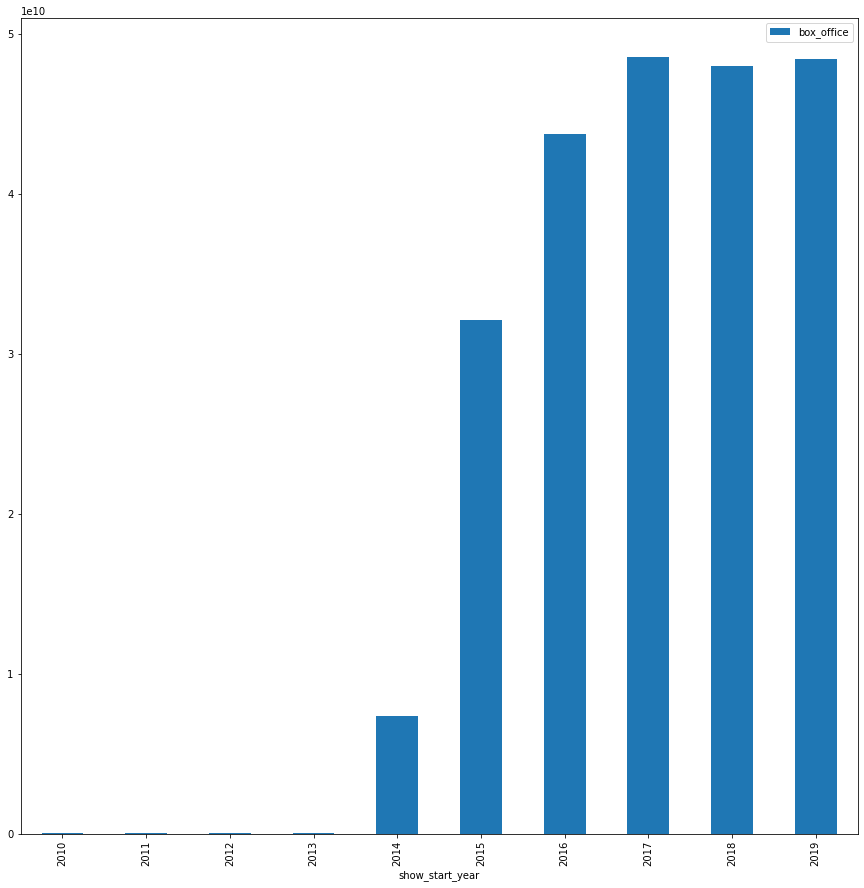

In [15]:
data_prokat2 = data.pivot_table(index='show_start_year', values='box_office', aggfunc ='sum')
display(data_prokat2)
data_prokat2.plot(kind='bar',figsize=(15,15))


Рост суммы сборов наблюдается с 2010г.(минимальное значение 2,374,340.00) по 2017г.(максимальное значение 48,563,707,217.51).
2018-2019г. года есть небольшое снижение суммы сборов по сравнению с 2017г.
 

<div class="alert alert-success">
<h1> Комментарий ревьюера &#9989;</h1>

Согласен. 
    
</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [16]:
pd.options.display.float_format = '{:,.2f}'.format

data_prokat2 = data.pivot_table(index='show_start_year', values='box_office', aggfunc =('sum','mean','median'))
display(data_prokat2)

,mean,median,sum
show_start_year,,,
2010,"26,981.14","1,868.00","2,374,340.00"
2011,"142,289.69","3,042.50","13,944,390.00"
2012,"55,733.72","6,692.50","6,465,111.00"
2013,"169,139.38","3,565.00","29,768,531.20"
2014,"28,687,153.98","22,490.00","7,372,598,571.60"
2015,"74,442,343.06","4,327,265.70","32,084,649,858.37"
2016,"87,288,312.75","3,640,802.30","43,731,444,689.34"
2017,"136,032,793.33","9,968,340.00","48,563,707,217.51"
2018,"101,235,702.73","8,821,498.98","47,985,723,095.29"


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

box_office
show_start_year age_restriction                                         
2015            «0+» - для любой зрительской аудитории    273,367,767.78
                «12+» - для детей старше 12 лет        11,957,220,583.41
                «16+» - для детей старше 16 лет         8,274,253,188.89
                «18+» - запрещено для детей             3,184,097,942.98
                «6+» - для детей старше 6 лет           8,395,710,375.31
2016            «0+» - для любой зрительской аудитории    150,183,548.67
                «12+» - для детей старше 12 лет        12,178,337,053.01
                «16+» - для детей старше 16 лет        14,359,349,614.80
                «18+» - запрещено для детей             4,990,430,064.62
                «6+» - для детей старше 6 лет          12,053,144,408.24
2017            «0+» - для любой зрительской аудитории    229,598,930.00
                «12+» - для детей старше 12 лет         7,851,427,660.67
                «16+» - для детей старше 16 лет        18,745,042,900.06
                «18+» - запрещено для детей             9,651,495,581.02
                «6+» - для детей старше 6 лет          12,086,142,145.76
2018            «0+» - для любой зрительской аудитории     32,449,002.11
                «12+» - для детей старше 12 лет        14,267,291,660.69
                «16+» - для детей старше 16 лет        14,820,922,307.93
                «18+» - запрещено для детей             8,760,085,501.15
                «6+» - для детей старше 6 лет          10,104,974,623.41
2019            «0+» - для любой зрительской аудитории     17,746,066.82
                «12+» - для детей старше 12 лет        12,680,198,773.67
                «16+» - для детей старше 16 лет        12,751,160,600.60
                «18+» - запрещено для детей            10,121,796,303.64
                «6+» - для детей старше 6 лет          12,852,548,650.86

<AxesSubplot:xlabel='show_start_year,age_restriction'>

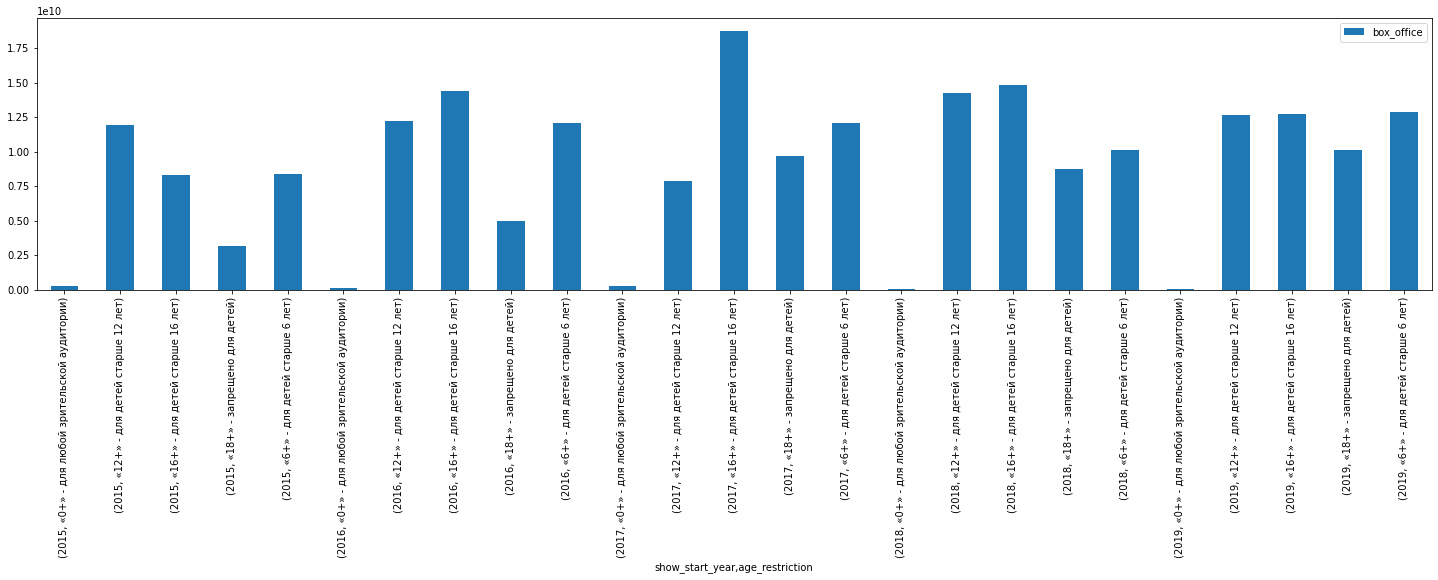

In [17]:
data_prokat3 = data.loc[data['show_start_year'] >= 2015].pivot_table(index=('show_start_year','age_restriction'), values='box_office', aggfunc ='sum')
display(data_prokat3)
data_prokat3.plot(kind='bar',figsize=(25,5))


График сверху наглядно показывает влияние возрастного ограничения на кассовые сборы. Так больше всех собирают фильмы с ограничением 16+,12+,6+ , а меньше всех 0+ и 18+(фильмы с ограничением 18+ не рассчитаны на массового зрителя)

<div class="alert alert-success">
<h1> Комментарий ревьюера &#9989;</h1>

Согласен. 
    
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

,support_total
show_start_year,
2014,"146,000,000.00"
2015,"1,493,952,404.00"
2016,"2,914,104,482.00"
2017,"1,977,971,662.00"
2018,"1,592,000,000.00"
2019,"2,458,000,000.00"


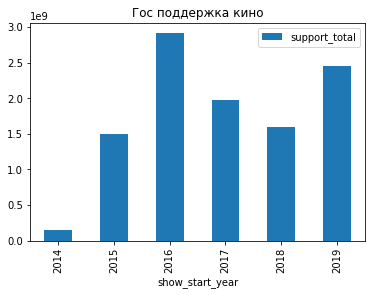

In [18]:
data_support = data.loc[data['refundable_support'] > 0]
#сколько средств выделяется на поддержку кино
data_support1 = data_support.pivot_table(index='show_start_year', values='support_total', aggfunc='sum')
data_support1.plot(kind='bar',title='Гос поддержка кино')
display(data_support1)


После санкций 2014, гос поддержка фильмов начала стремительно увеличиваться. 

/tmp/ipykernel_55/1992838341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['pribyl'] = data_support['box_office'] - data_support['budget']


count              109.00
mean        44,989,162.75
std        456,341,218.14
min     -1,971,477,243.41
25%        -78,375,033.00
50%        -39,269,755.12
75%         70,299,052.00
max      2,913,568,690.79
Name: pribyl, dtype: float64

<AxesSubplot:title={'center':'окупаемость'}, ylabel='Frequency'>

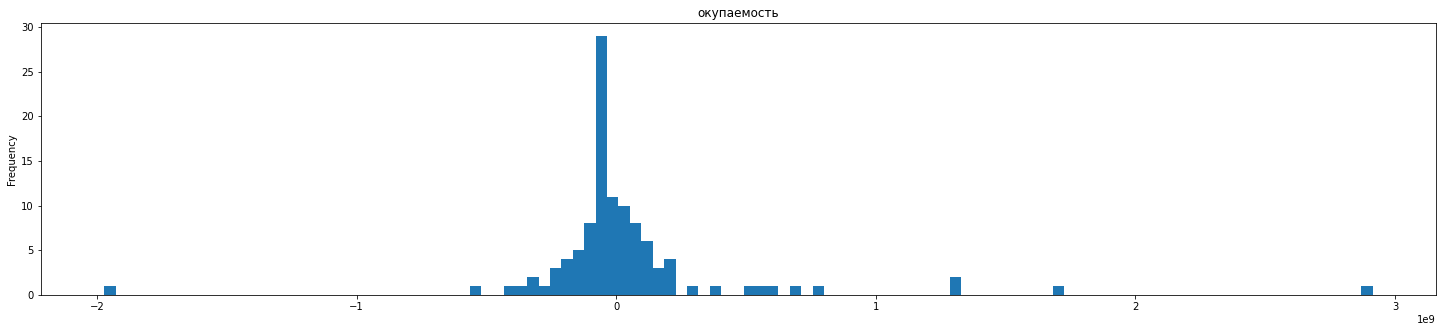

In [19]:
#окупаемость
data_support['pribyl'] = data_support['box_office'] - data_support['budget']
pd.options.display.float_format = '{:,.2f}'.format
display(data_support['pribyl'].describe())
data_support['pribyl'].plot(kind='hist',bins=111,figsize=(25,5), title='окупаемость')


<div class="alert alert-danger">
<h1> Комментарий ревьюера &#9940;</h1>
    
Александр, выше ты ввел метрику окупаемости.
    
Сейчас заказчику для того, чтобы понять, о чем идет речь, нужно будет читать код, что не очень хорошо.
    
Важно дополнить пояснения к графику объеснением того, что такое окупаемость и что именно мы видим на графике?

</div>
<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
Поправил

</div>

Произведён расчёт окупаемости фильмов по формуле  прибыль = сборы - бюджет <br>
Данные выведены в виде гистограммы. Как мы видим основная масса значений находиться около нуля в отрицательной зоне, что говорит о следующем:
- Фильмы с гос поддержкой очень плохо окупаются.


<div class="alert alert-success">
<h1> Комментарий ревьюера. vol. 2 &#9989;</h1>

Отлично, думаю, пояснения пошли на пользу. Спасибо!
    
</div>

count   108.00
mean      5.84
std       1.24
min       2.80
25%       5.00
50%       5.95
75%       6.70
max       8.50
Name: ratings, dtype: float64

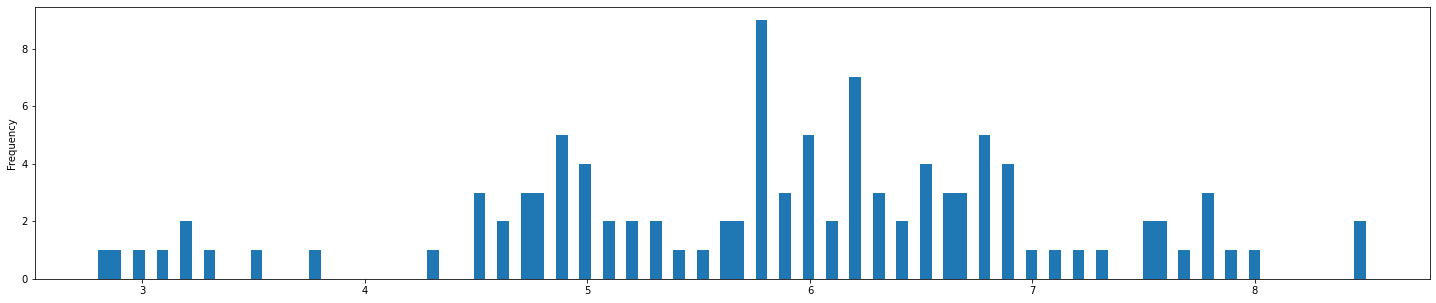

In [20]:
#рейтинг фильмов с гос участием 
data_support['ratings'].sort_values().plot(kind='hist',bins=108,figsize=(25,5))
data_support['ratings'].describe()
#display(data_support)

Средний рейтинг фильмов с гос.поддержкой 5,84 (медиана 5,95 близка к среднему, это указывает на нормальное распределение данных)<br>
Рейтинг фильмов с гос.поддержкой 5,84 это хороший результат.

<div class="alert alert-warning">
<h1> Комментарий ревьюера &#128276;</h1>

Думаю, стоит дополнить пояснения объяснением того, почему близость среднего и медианы - это "неплохо"?
    
</div>

### Шаг 5. Напишите общий вывод

<h4>Предобработки данных</h4>

В ходе предобработки данных  было сделано:
- Объединение таблиц данных.
- Работа по поиску и удалению дубликатов.
- Анализ пропусков значений.
- Проверка корректности значений.
- Добавление необходимых столбцов в соответствии с ТЗ.

<h4>Результаты</h4>

- Рост суммы сборов наблюдается с 2010г.(минимальное значение 2,374,340.00) по 2017г.(максимальное значение 48,563,707,217.51).
2018-2019г. года есть небольшое снижение суммы сборов по сравнению с 2017г.
- Больше всех собирают фильмы с ограничением 16+,12+,6+ , а меньше всех 0+ и 18+
- После санкций 2014, гос.поддержка фильмов начала стремительно увеличиваться
- Фильмы с гос.поддержкой очень плохо окупаются.
- Рейтинг фильмов с гос.поддержкой 5,84 это хороший результат.


<h4>Общие рекомендации и наблюдения</h4>

Фильмы для которых оказывалась гос поддержка имеют средний рейтинг, и плохую окупаемость,
это наводит мысли на то, что студии получив финансирование особо не беспокоятся о качестве конечного продукта.
- Предложения:
- Исключить пункт «невозвратные средства».
- Ужесточить контроль над расходованием бюджетных средств.


<div class="alert alert-warning">
<h1> Комментарий ревьюера &#128276;</h1>

Неплохой вывод. 
    
Очень рекомендую включать в общий вывод данные обо всем исследовании: 
    
1. Коротко описать ход предобработки данных (какие именно действия были предприняты и как эти действия повлияли на датасет)
2. Повторно привести экстримальные значения в результирующих таблицах (например: "самая успешная группа заемщиков - заемщики с пятью детьми (должников нет), наименее успешная - семьи с 2 и 4 детьми (9.5% и более)" и так далее)
3. Общие рекомендации и наблюдения (у тебя это включено)
    
Подобная организация вывода позволит заказчику максимально быстро ознакомиться с результатами исследования и вернуться к тебе с обратной связью, а ты в свою очередь дополнительно закрепишь результаты своей работы в собственной голове, что поможет отвечать на поступающие вопросы быстрее. 

</div>
</div>
<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
Поправил

</div>

<div class="alert alert-success">
<h1> Итерация 1. Заключение. </h1>
    
Александр, в работе выше есть ряд недостатков, которые важно исправить.
    
Речь в первую очередь о пропуске некоторых этапов и отсутствии пояснении к исследованию. Важно предоставлять заказчику не только код и графики, но и пояснения на естественном языке. Этот аспект важно будет доработать.

В своем ответе под этой ячейкой подскажи, пожалуйста, сильно ли тебя поджимает время. Если этот проект не единственный и ты выполняешь какие-то еще, дай знать: мы найдем способ ускорить работу над этим заданием. 
    
Не забывай, что я буду рад ответить на любые твои вопросы относительно требуемых правок. 
    
Очень жду работу на повторную проверку. Удачи!)

</div>

<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
Все сделаю

</div>

<div class="alert alert-success">
<h1> Итерация 2. Заключение. </h1>
    
Александр, правки выше внесены корректно.
    
Остался один аспект, который я просил подсветить на первой итерации. Отметил его выше. После внесения этого дополнения смогу принять проект. Осталось совсем чуть-чуть)
    
Жду работу на повторное ревью. Успехов!)

</div>

<div class="alert alert-success">
<h1> Итерация 3. Заключение. </h1>
    
Александр, все правки учтены - проект принят.
    
Успехов в дальнейшем обучении!)

</div>